# Classification on Diabetes Data in R

For classification, find the best from below ML algroithms:

    Gaussian Naive Bayes
    Support Vector Machine (SVM)
    Logistic Regression
    K Nearest Neighbors (K-NN)
    Decision Tree 
    Random Forest
    Neural Network
    Gardiant Boosting

![Top ML](https://editor.analyticsvidhya.com/uploads/32753Screenshot%202020-11-28%20at%2010.09.40%20PM.png)

##  Data Preparation
### 768 Females of Pima Indian Heritage

We have 768 instances and the following 8 attributes:

    Number of times pregnant (preg)
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
    Diastolic blood pressure in mm Hg (pres)
    Triceps skin fold thickness in mm (skin)
    2-Hour serum insulin in mu U/ml (insu)
    Body mass index measured as weight in kg/(height in m)^2 (mass)
    Diabetes pedigree function (pedi)
    Age in years (age)
    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)


In [14]:
defaultW <- getOption("warn") 
options(warn = -1) 

# load libraries

if (!require(tidyverse)) install.packages('tidyverse')   # data manipulation
suppressWarnings(suppressMessages(library(tidyverse) ))

if (!require(ggplot2)) install.packages('ggplot2')
suppressWarnings(suppressMessages(library(ggplot2)))

if (!require(GGally)) install.packages('GGally')
suppressWarnings(suppressMessages(library("GGally")))

if (!require(caret)) install.packages('caret') # Train/test functions
suppressWarnings(suppressMessages(library(caret)  ))

#if (!require(e1071)) install.packages('e1071') # machine learning functions
#library(e1071)

#if (!require(mlbench)) install.packages('mlbench')
#library(mlbench)

if (!require(naivebayes)) install.packages('naivebayes')  # Naive Bayes functions
suppressWarnings(suppressMessages(library(naivebayes) ))

if (!require(randomForests)) install.packages('randomForest')  # Random Forest functions
suppressWarnings(suppressMessages(library(randomForest)))

if (!require(RSNNS)) install.packages('RSNNS')  # Multi-Layer Perceptron functions
suppressWarnings(suppressMessages(library(RSNNS)))


if (!require(gbm)) install.packages('gbm')  # Gradient Boosting Machines functions
suppressWarnings(suppressMessages(library(gbm)))

if (!require(rpart)) install.packages('rpart')  # CART functions
suppressWarnings(suppressMessages(library(rpart)))


if (!require(knnn)) install.packages('kknn')  # k-nearest neighbor classification
suppressWarnings(suppressMessages(library(kknn)))



Loading required package: randomForests
Loading required package: knnn


In [15]:
# dataset from
url <- "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

# Import dataset
rawdata <- read.csv(url,header=TRUE, sep=",", as.is=TRUE)
rawdata %>% 
    as_tibble() %>%
    head()   # See top 6 rows 

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [16]:
# Structure of the dataframe
rawdata %>% str()

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


## Descriptive statistics

In [17]:
rawdata %>% summary()

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [18]:
# any na
na_count <-sapply(rawdata, function(y) sum(length(which(is.na(y)))))
na_count

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [19]:
# The skimr package provides a nice solution to show key descriptive stats for each column.
if (!require(skimr)) install.packages('skimr') 
suppressWarnings(suppressMessages(library(skimr)))
                 
skimmed <- skim_to_wide(rawdata)
skimmed[,1:8]

-- Data Summary ------------------------
                           Values
Name                       .data 
Number of rows             768   
Number of columns          9     
_______________________          
Column type frequency:           
  numeric                  9     
________________________         
Group variables            None  

-- Variable type: numeric ------------------------------------------------------
# A tibble: 9 x 7
  skim_variable            n_missing complete_rate    mean      sd     p0    p25
* <chr>                        <int>         <dbl>   <dbl>   <dbl>  <dbl>  <dbl>
1 Pregnancies                      0             1   3.85    3.37   0      1    
2 Glucose                          0             1 121.     32.0    0     99    
3 BloodPressure                    0             1  69.1    19.4    0     62    
4 SkinThickness                    0             1  20.5    16.0    0      0    
5 Insulin                          0             1  79.8   115.    

## Display Data

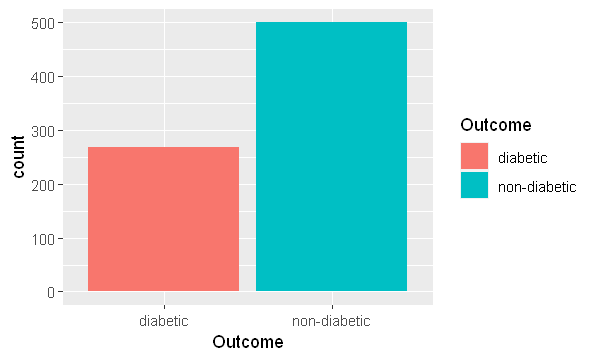

In [20]:
options(repr.plot.width=5, repr.plot.height=3)

df <- rawdata %>%
    mutate( Outcome = ifelse (Outcome == 0 ,"non-diabetic","diabetic")) %>%
    mutate(Outcome = as.factor(Outcome)) 
df %>%
    ggplot() +
    geom_bar(aes(x=Outcome, fill=Outcome))


options(repr.plot.width=NULL, repr.plot.height=NULL)
# https://irkernel.github.io/docs/repr/0.6/repr-options.html

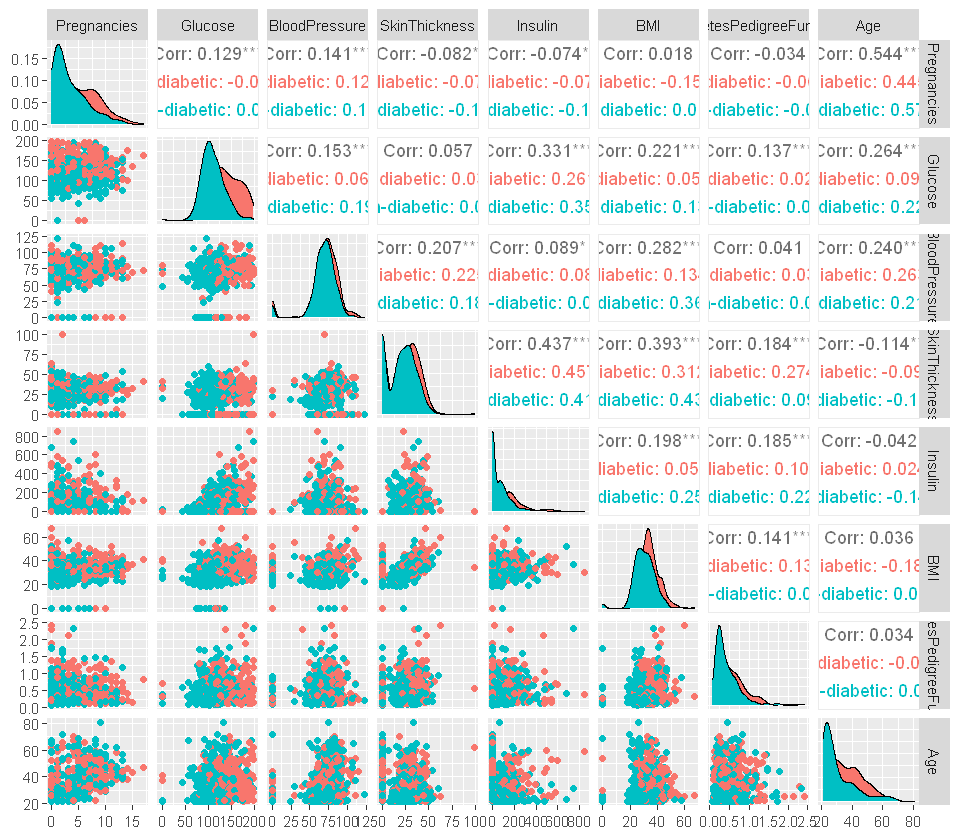

In [21]:
options(repr.plot.width=8, repr.plot.height=7, repr.plot.pointsize=5)

# remove  nominal data columns

# plot corr matrix
df %>% 
    select(-Outcome)  %>%
     ggpairs(aes(color=df$Outcome)) 

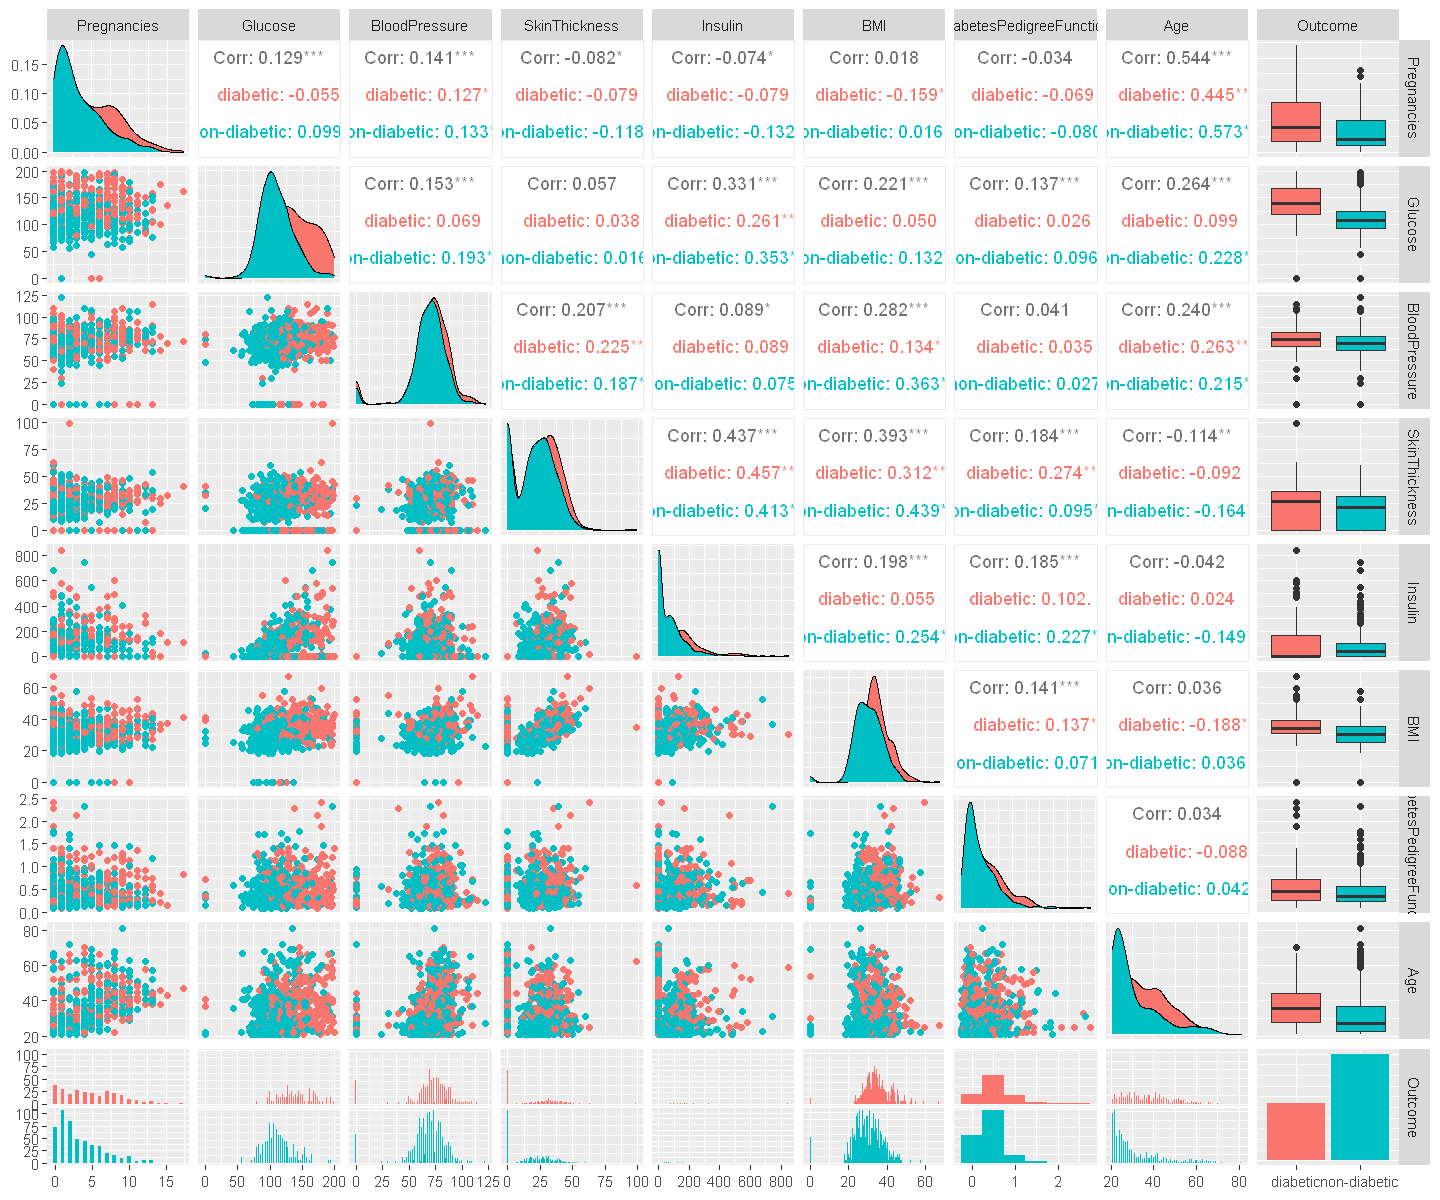

In [22]:
options(repr.plot.width=12, repr.plot.height=10, repr.plot.pointsize=8)

df %>%
    ggpairs(
        aes(color=df$Outcome),
        lower=list(combo= wrap("facethist",
                                binwidth=0.5)
                  )
    )

As we can see from the plot, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f

Gaussian Distribution — BMI, BloodPressure, Glucose.

Non-Gaussian Distribution — Age, DiabetesPedigreeFunction, Insulin, Pregnancies, SkinThickness

### Splitting the Data-Set into Training Set and Test Set

In [23]:
# https://rstatisticsblog.com/data-science-in-action/data-preprocessing/six-amazing-function-to-create-train-test-split-in-r/

# Create the training and test datasets
set.seed(123)
index <- createDataPartition(rawdata$Outcome, p = 0.80, list = FALSE)
trn <- df[index, ]   #  Create the training  dataset
tst <- df[-index, ]  # Create the test dataset

dim(trn)
dim(tst)

[1] 615   9

[1] 153   9

In [24]:
anyNA(trn)

[1] FALSE

In [25]:
sapply(trn, class)

Pregnancies                  Glucose            BloodPressure 
               "integer"                "integer"                "integer" 
           SkinThickness                  Insulin                      BMI 
               "integer"                "integer"                "numeric" 
DiabetesPedigreeFunction                      Age                  Outcome 
               "numeric"                "integer"                 "factor"

### Cross validation

We will be using K- fold cross validation, with number of folds (k) set at 10 and 3 repeats.

https://www.pluralsight.com/guides/validating-machine-learning-models-with-r

Repeated K-fold Cross-Validation

The process of splitting the data into k folds can be repeated a number of times. This is called repeated k-fold cross-validation*, in which the final model accuracy is taken as the mean of the number of repeats.

Leave-One-Out Cross-Validation (LOOCV)

Leave-one-out cross-validation, or LOOCV, is the cross-validation technique in which the size of the fold is “1” with “k” being set to the number of observations in the data. This variation is useful when the training data is of limited size and the number of parameters to be tested is not high.

In [26]:
tcontrol <- caret::trainControl(method="repeatedcv", number=10, repeats=3)
#tcontrol <- trainControl(method="LOOCV", number=10)

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

### Scaling

Few key points to note :

    Mean centering does not affect the covariance matrix
    Scaling of variables does affect the covariance matrix
    Standardizing affects the covariance

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network.
KNN, K-Means, PCA algorithms where feature scaling matters.

Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.

Summary

We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. This step is not mandatory when dealing with Tree-based algorithms.

https://machinelearningmastery.com/pre-process-your-dataset-in-r/

#### Summary of Transform Methods
Below is a quick summary of all of the transform methods supported in the method argument of the preProcess() function in caret.

    “BoxCox“: apply a Box–Cox transform, values must be non-zero and positive.
    “YeoJohnson“: apply a Yeo-Johnson transform, like a BoxCox, but values can be negative.
    “expoTrans“: apply a power transform like BoxCox and YeoJohnson.
    “zv“: remove attributes with a zero variance (all the same value).
    “nzv“: remove attributes with a near zero variance (close to the same value).
    “center“: subtract mean from values.
    “scale“: divide values by standard deviation.
    “range“: normalize values.
    “pca“: transform data to the principal components.
    “ica“: transform data to the independent components.
    “spatialSign“: project data onto a unit circle.

###  Modeling onTrain data

Using the training partition we fit a few different classification model types using 10-fold cross validation and 3 repeats.

In [27]:
#### https://topepo.github.io/caret/available-models.html
#### 


# Naive Bayes
set.seed(123)
modelNB <- caret::train(Outcome ~ ., data = trn, method = "naive_bayes", trControl = tcontrol, verbose = FALSE)

# Random Forest
set.seed(123)
modelRFC <- caret::train(Outcome ~ ., data = trn, method = "rf", trControl = tcontrol, verbose = FALSE)

# Boosted Logistic Regression     #######  this way works for me   #################
set.seed(123)
#modelLRC <- caret::train(Outcome ~ ., data = trn, method = "LogitBoost", family = "binomial", preProcess = c("range"), trControl = tcontrol, verbose = FALSE)
modelLRC <- caret::train(Outcome ~ ., data = trn, method = "glm", family = "binomial", preProcess = c("range"), 
                         trControl = trainControl(method="repeatedcv", number=10, repeats=3) )

# SVM  with Linear Kernel
set.seed(123)
modelSVC <- caret::train(Outcome~., data=trn, method="svmLinear2", preProcess = c("range"), trControl=tcontrol, verbose = FALSE)

# Neural Network (Multi-Layer Perceptron)
set.seed(123)
modelMLP <- caret::train(Outcome ~ ., data=trn, method = "mlp" , preProcess = c("range"), trControl=tcontrol, verbose = FALSE)

# Stocastic Gardiant Boosting 
set.seed(123)
modelGBM <- caret::train(Outcome ~ ., data=trn,  method="gbm", trControl=tcontrol, verbose = FALSE)

# k-nearest neighbor classification
set.seed(123)
modelKNN <- caret::train(Outcome ~ ., data = trn, method = "kknn", preProcess = c("range"), trControl = tcontrol, verbose = FALSE)  # data is normalised using Preprocess

# Decision Tree (CART)  #######  this way works for me   #################
set.seed(123)
modelDTC <- caret::train(Outcome ~ ., data=trn,  method="rpart",  
                         trControl=trainControl(method="repeatedcv", number=10, repeats=3))

# Cost-Sensitive C5.0
#set.seed(123)
#modelDTC <- caret::train(Outcome ~.,data=trn, ,method = "C5.0Cost" , trControl = tcontrol, verbose = FALSE)

After the models are trained, they are added to a list and resamples() is called on the list of models. This function checks that the models are comparable and that they used the same training scheme (trainControl configuration). This object contains the evaluation metrics for each fold and each repeat for each algorithm to be evaluated.

In [28]:
# collect resamples
results <- resamples(list(NB=modelNB, 
                          LRC=modelLRC,
                          SVC=modelSVC,
                          KNN=modelKNN,
                          RFC=modelRFC,
                          GBM=modelGBM,
                          DTC=modelDTC,
                          MLP=modelMLP
                         )
                    )

### Compare Models

In [29]:
# summarize differences between modes
summary(results)


Call:
summary.resamples(object = results)

Models: NB, LRC, SVC, KNN, RFC, GBM, DTC, MLP 
Number of resamples: 30 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
NB  0.6451613 0.7061079 0.7562136 0.7532293 0.8024194 0.8709677    0
LRC 0.6721311 0.7254098 0.7786885 0.7754137 0.8185484 0.9032258    0
SVC 0.6451613 0.7258065 0.7642782 0.7705576 0.8177552 0.9032258    0
KNN 0.5806452 0.6963908 0.7258065 0.7218432 0.7570730 0.8225806    0
RFC 0.6229508 0.7178279 0.7480169 0.7462139 0.7741935 0.8548387    0
GBM 0.6393443 0.7287811 0.7642782 0.7683533 0.8064516 0.9032258    0
DTC 0.6229508 0.7096774 0.7317557 0.7397708 0.7732681 0.8524590    0
MLP 0.6393443 0.7287811 0.7580645 0.7694465 0.8064516 0.8870968    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
NB  0.20881671 0.3459131 0.4316046 0.4425645 0.5583508 0.7181818    0
LRC 0.25970874 0.3648617 0.4832497 0.4799961 0.5847840 0.7796209    0
SVC 0.20881671 0.3611090 0.4673839

Accuracy is the percentage of correctly classifies instances out of all instances.
https://machinelearningmastery.com/machine-learning-evaluation-metrics-in-r/

Kappa https://blogs.fu-berlin.de/reseda/accuracy-statistics-in-r/

The Kappa Coefficient can be used to evaluate the accuracy of a classification. It evaluates how well the classification performs compared to map, in which all values are just randomly assigned.
The Kappa coefficient can range from -1 to 1.

    A value of 0 indicates that the classification is as good as random values.
    A value below 0 indicates the classification is significantly worse than random.
    A value greater than 0 indicates that the classification is significantly better than random.

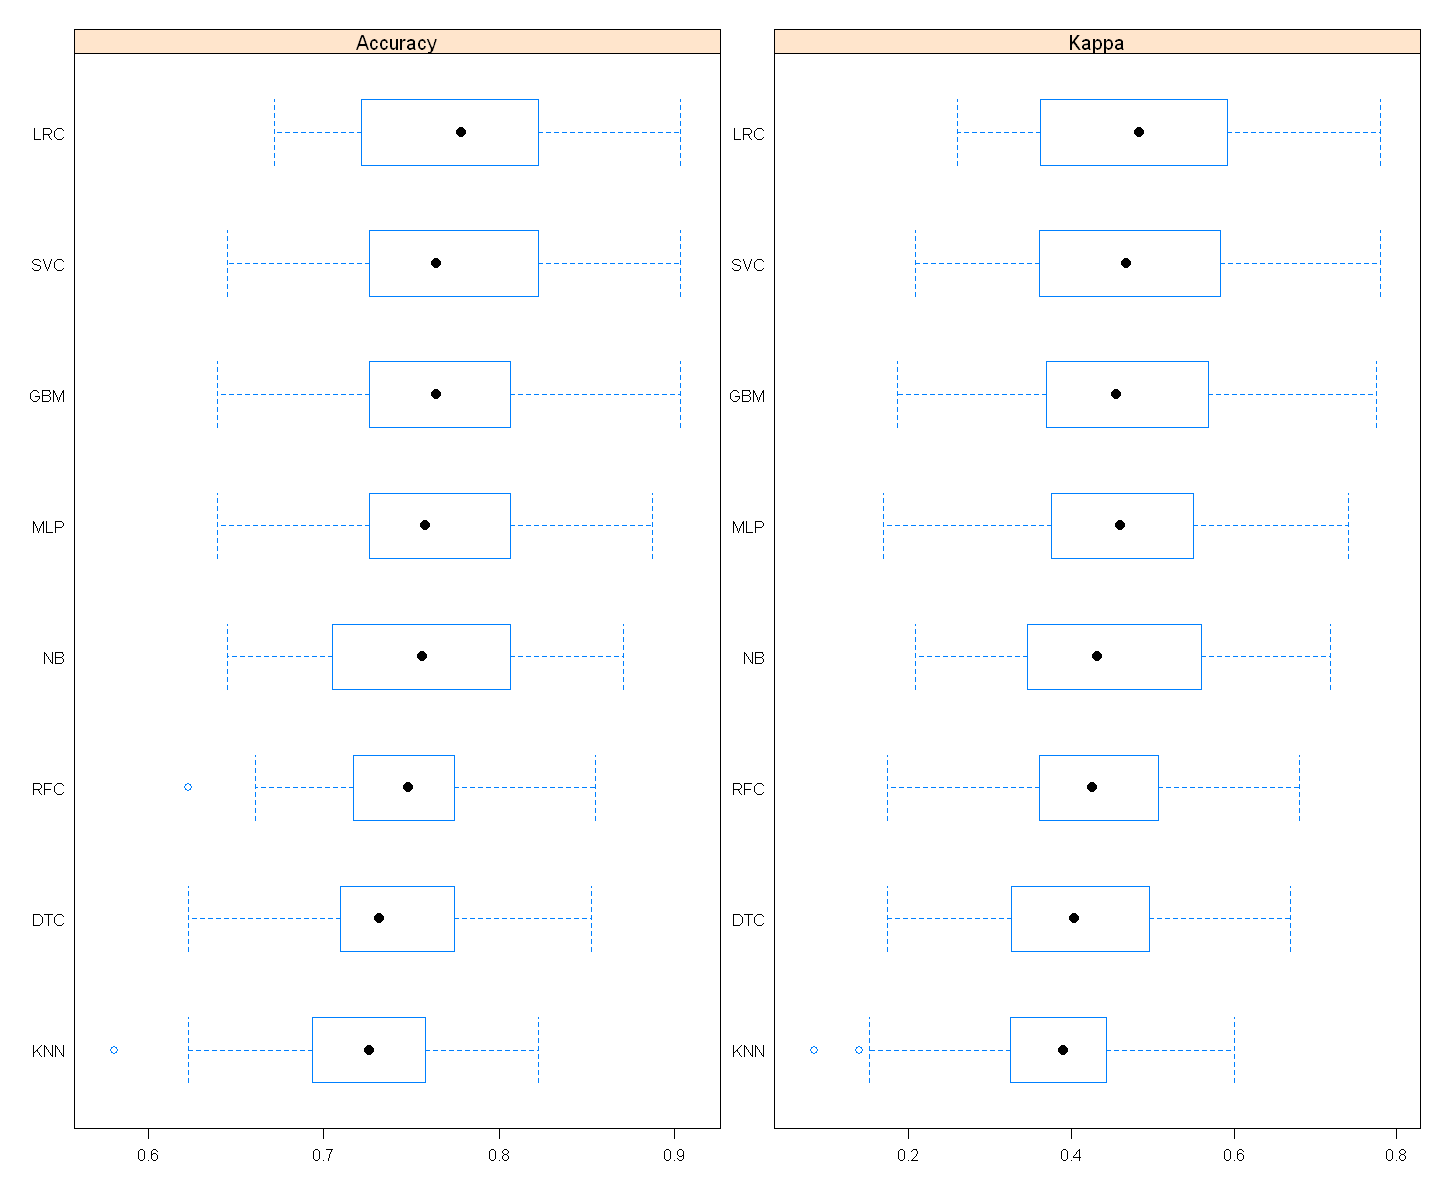

In [126]:
# box and whisker plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(results, scales=scales)

#### The best 3 models are MLP, GBM and SVC based on median of Accuracy in K-Fold Cross Validation

## Statistical Significance Tests

In [31]:
# difference in model predictions
diffs <- diff(results)
# summarize p-values for pair-wise comparisons
summary(diffs)


Call:
summary.diff.resamples(object = diffs)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
    NB        LRC       SVC       KNN       RFC       GBM       DTC      
NB            -0.022184 -0.017328  0.031386  0.007015 -0.015124  0.013458
LRC 0.4379531            0.004856  0.053570  0.029200  0.007060  0.035643
SVC 1.0000000 1.0000000            0.048714  0.024344  0.002204  0.030787
KNN 0.2147211 1.27e-05  0.0003570           -0.024371 -0.046510 -0.017928
RFC 1.0000000 0.0296616 0.2836342 0.4454905           -0.022139  0.006443
GBM 1.0000000 1.0000000 1.0000000 0.0008804 0.0843561            0.028582
DTC 1.0000000 0.0286579 0.1718479 1.0000000 1.0000000 0.0824173          
MLP 1.0000000 1.0000000 1.0000000 0.0004201 0.2649208 1.0000000 0.1279933
    MLP      
NB  -0.016217
LRC  0.005967
SVC  0.001111
KNN -0.047603
RFC -0.023233
GBM -0.001093
DTC -0.029676
MLP          

Kappa 
    NB        LRC  

The lower diagonal of the table shows p-values for the null hypothesis (distributions are the same), smaller is better. We can see no difference between NB with SVC, RFC, GBM, DTC, MLP, we can also see little difference between the distributions for LRC with NB and KNN.

## Hyperparameter tuning on best 4 models:
https://www.machinelearningplus.com/machine-learning/caret-package/

### Hyperparameter tuning on Support Vector Machines

In [32]:
#  getting information related to the tuning parameters for a model. 
modelLookup("svmLinear2")

model,parameter,label,forReg,forClass,probModel
svmLinear2,cost,Cost,TRUE,TRUE,TRUE


In [33]:
# model before hypertuning
modelSVC

Support Vector Machines with Linear Kernel 

615 samples
  8 predictor
  2 classes: 'diabetic', 'non-diabetic' 

Pre-processing: re-scaling to [0, 1] (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 553, 553, 554, 554, 553, 555, ... 
Resampling results across tuning parameters:

  cost  Accuracy   Kappa    
  0.25  0.7694647  0.4674955
  0.50  0.7694735  0.4675694
  1.00  0.7705576  0.4699389

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cost = 1.

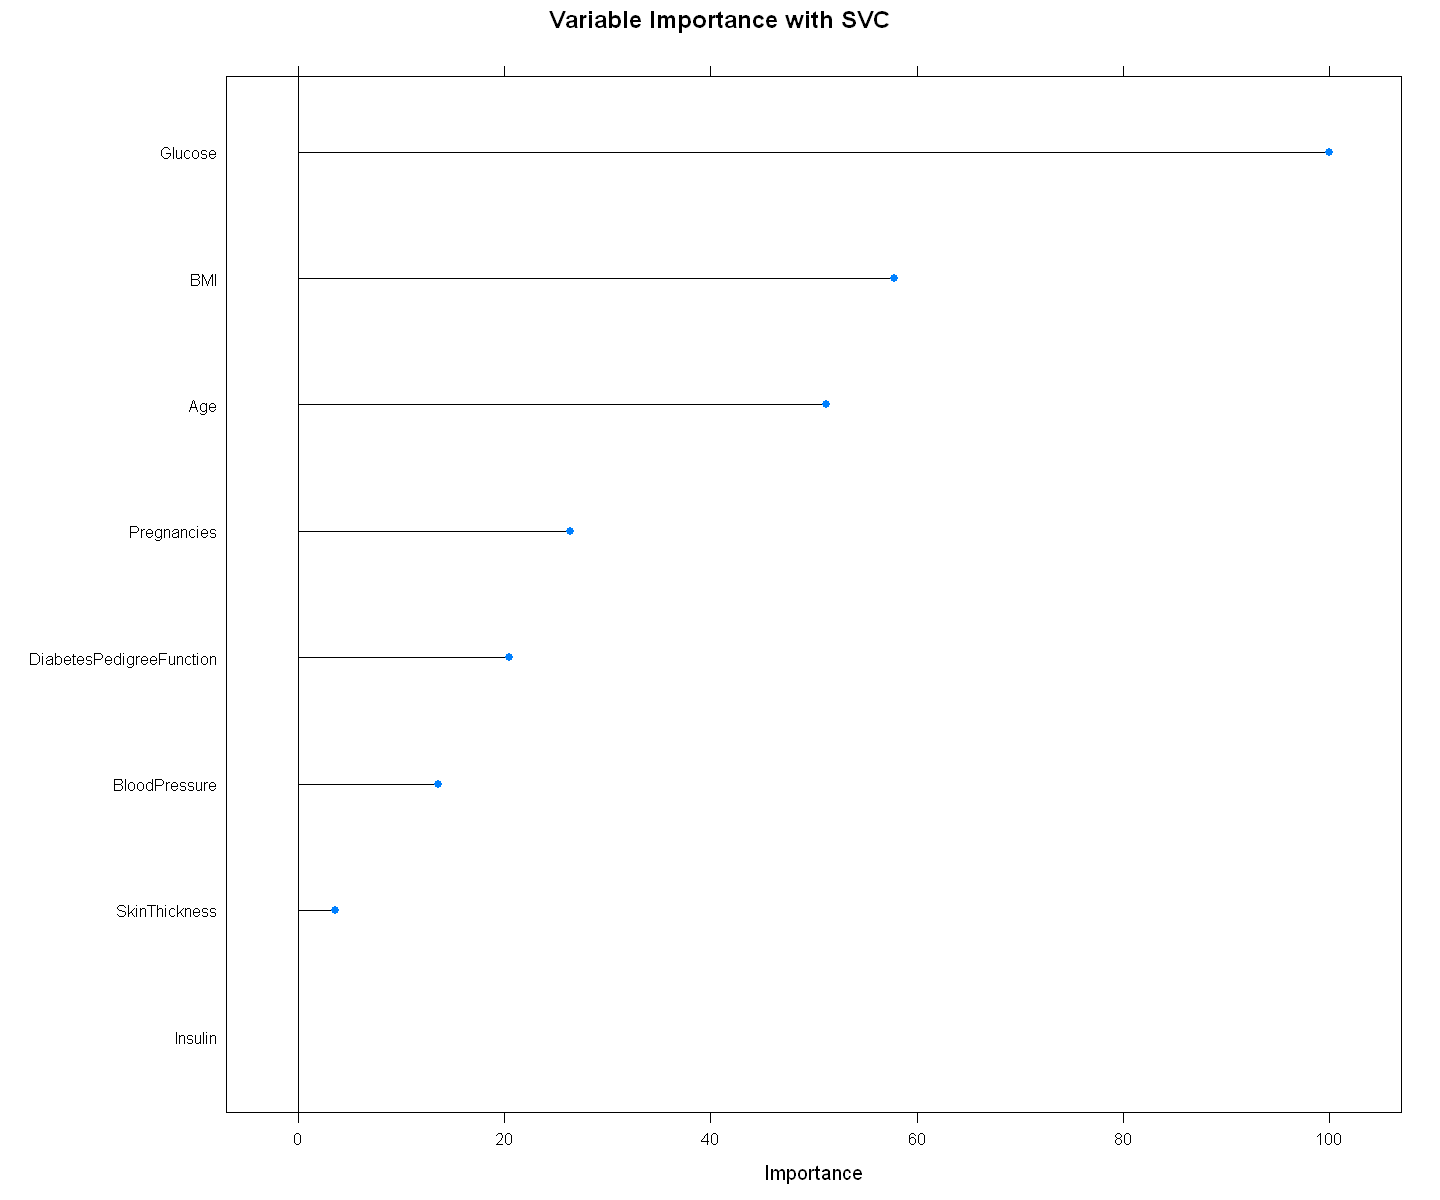

In [34]:
# compute variable importance
varimp_mars <- varImp(modelSVC)
plot(varimp_mars, main="Variable Importance with SVC")

In [61]:
# Predict on testData before hypertuning
predicted <- predict(modelSVC, tst)
# Compute the confusion matrix
caret::confusionMatrix(predicted,factor(tst$Outcome) )

Confusion Matrix and Statistics

              Reference
Prediction     diabetic non-diabetic
  diabetic           29           13
  non-diabetic       23           88
                                          
               Accuracy : 0.7647          
                 95% CI : (0.6894, 0.8294)
    No Information Rate : 0.6601          
    P-Value [Acc > NIR] : 0.003318        
                                          
                  Kappa : 0.45            
                                          
 Mcnemar's Test P-Value : 0.133614        
                                          
            Sensitivity : 0.5577          
            Specificity : 0.8713          
         Pos Pred Value : 0.6905          
         Neg Pred Value : 0.7928          
             Prevalence : 0.3399          
         Detection Rate : 0.1895          
   Detection Prevalence : 0.2745          
      Balanced Accuracy : 0.7145          
                                          
       'Positiv

In [35]:
# Fit the model on the training set
set.seed(123)
metric <- "Accuracy"

#SVM - Tune hyper parameters by setting tuneGrid
hyper_grid_svm <- expand.grid(cost = seq(0, 2, length = 20) ) # 10 ^ ((-2):1))
set.seed(1953)

# total number of combinations
nrow(hyper_grid_svm)

[1] 20

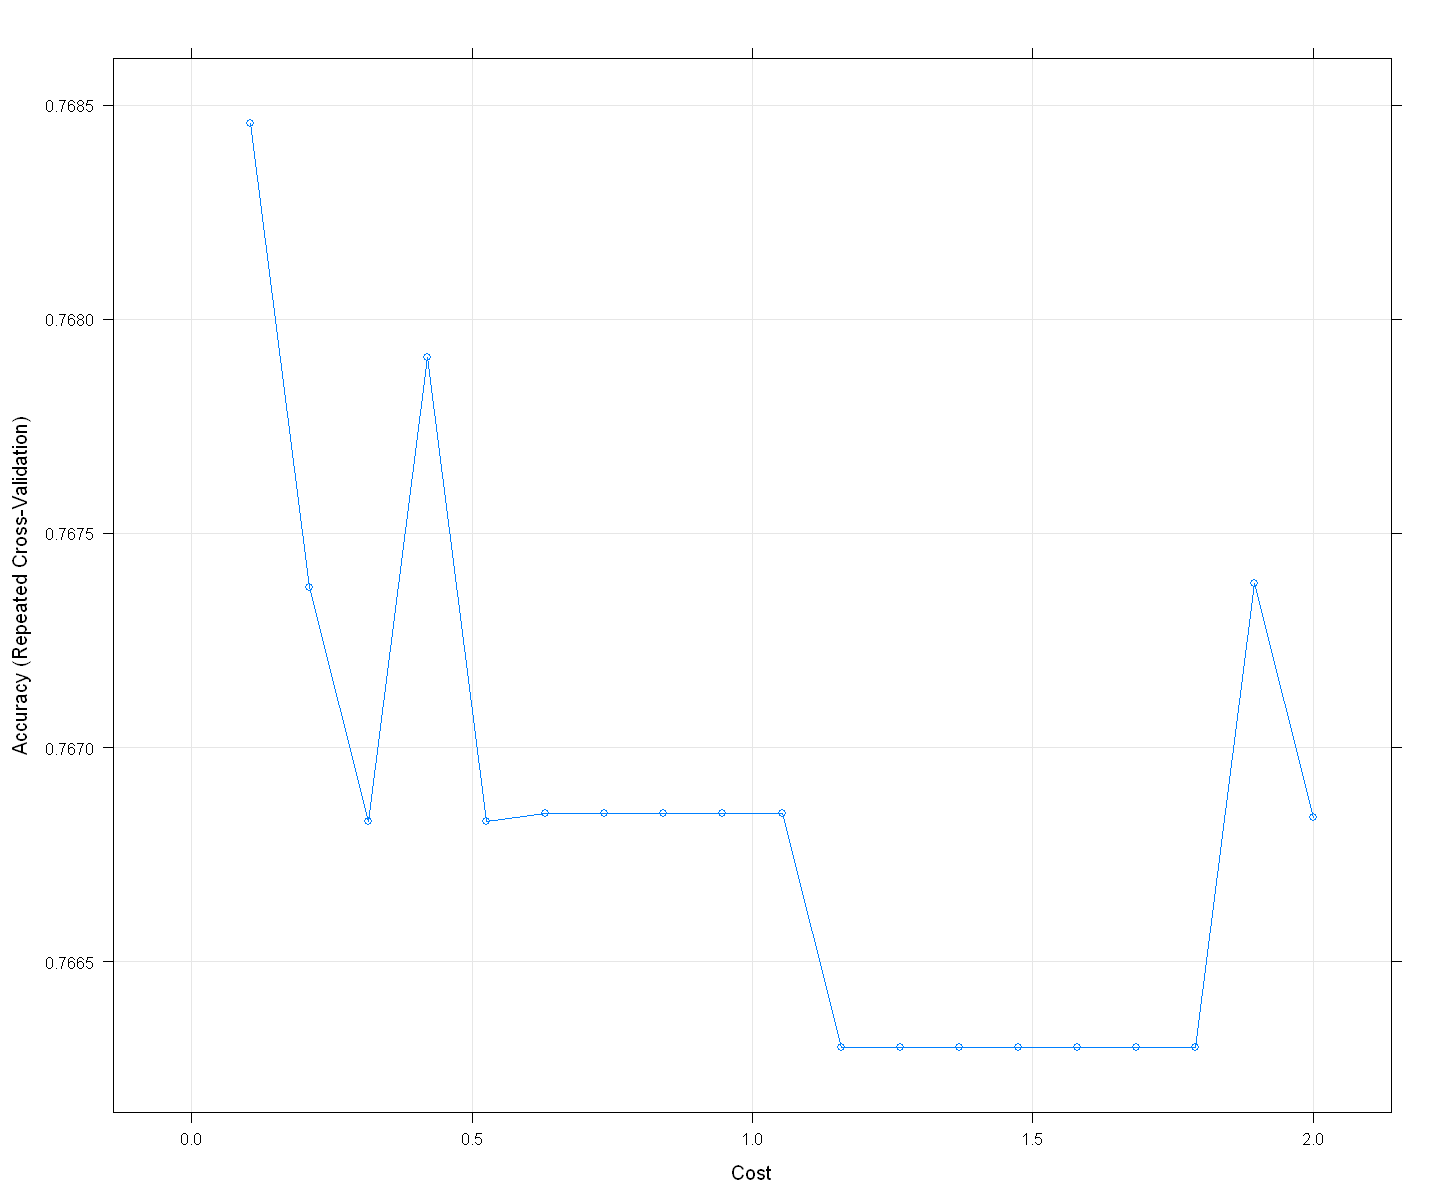

In [36]:
fit_svm <- caret::train(
  form = Outcome ~ .,
  data = trn,
  trControl = tcontrol,
  tuneGrid = hyper_grid_svm,
  method = "svmLinear2",
  preProcess = c("range"),
  metric = metric
)


# Plot model accuracy vs different values of Cost
plot(fit_svm)

In [37]:
fit_svm$finalModel


Call:
svm.default(x = as.matrix(x), y = y, kernel = "linear", cost = param$cost, 
    probability = classProbs)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1052632 

Number of Support Vectors:  335


In [68]:
# Predict on testData and Compute the confusion matrix after tuning
predicted2 <- predict(fit_svm, tst)
# Compute the confusion matrix
caret::confusionMatrix(predicted2,factor(tst$Outcome) )

Confusion Matrix and Statistics

              Reference
Prediction     diabetic non-diabetic
  diabetic           29           12
  non-diabetic       23           89
                                          
               Accuracy : 0.7712          
                 95% CI : (0.6965, 0.8352)
    No Information Rate : 0.6601          
    P-Value [Acc > NIR] : 0.001883        
                                          
                  Kappa : 0.4626          
                                          
 Mcnemar's Test P-Value : 0.090969        
                                          
            Sensitivity : 0.5577          
            Specificity : 0.8812          
         Pos Pred Value : 0.7073          
         Neg Pred Value : 0.7946          
             Prevalence : 0.3399          
         Detection Rate : 0.1895          
   Detection Prevalence : 0.2680          
      Balanced Accuracy : 0.7194          
                                          
       'Positiv

### Hyperparameter tuning on Nerual Network

In [38]:
#  getting information related to the tuning parameters for a model. 
modelLookup("mlp")

model,parameter,label,forReg,forClass,probModel
mlp,size,#Hidden Units,TRUE,TRUE,TRUE


In [39]:
# model before hypertuning
modelMLP

Multi-Layer Perceptron 

615 samples
  8 predictor
  2 classes: 'diabetic', 'non-diabetic' 

Pre-processing: re-scaling to [0, 1] (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 553, 553, 554, 554, 553, 555, ... 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
  1     0.7580945  0.4505995
  3     0.7624487  0.4632608
  5     0.7694465  0.4782956

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 5.

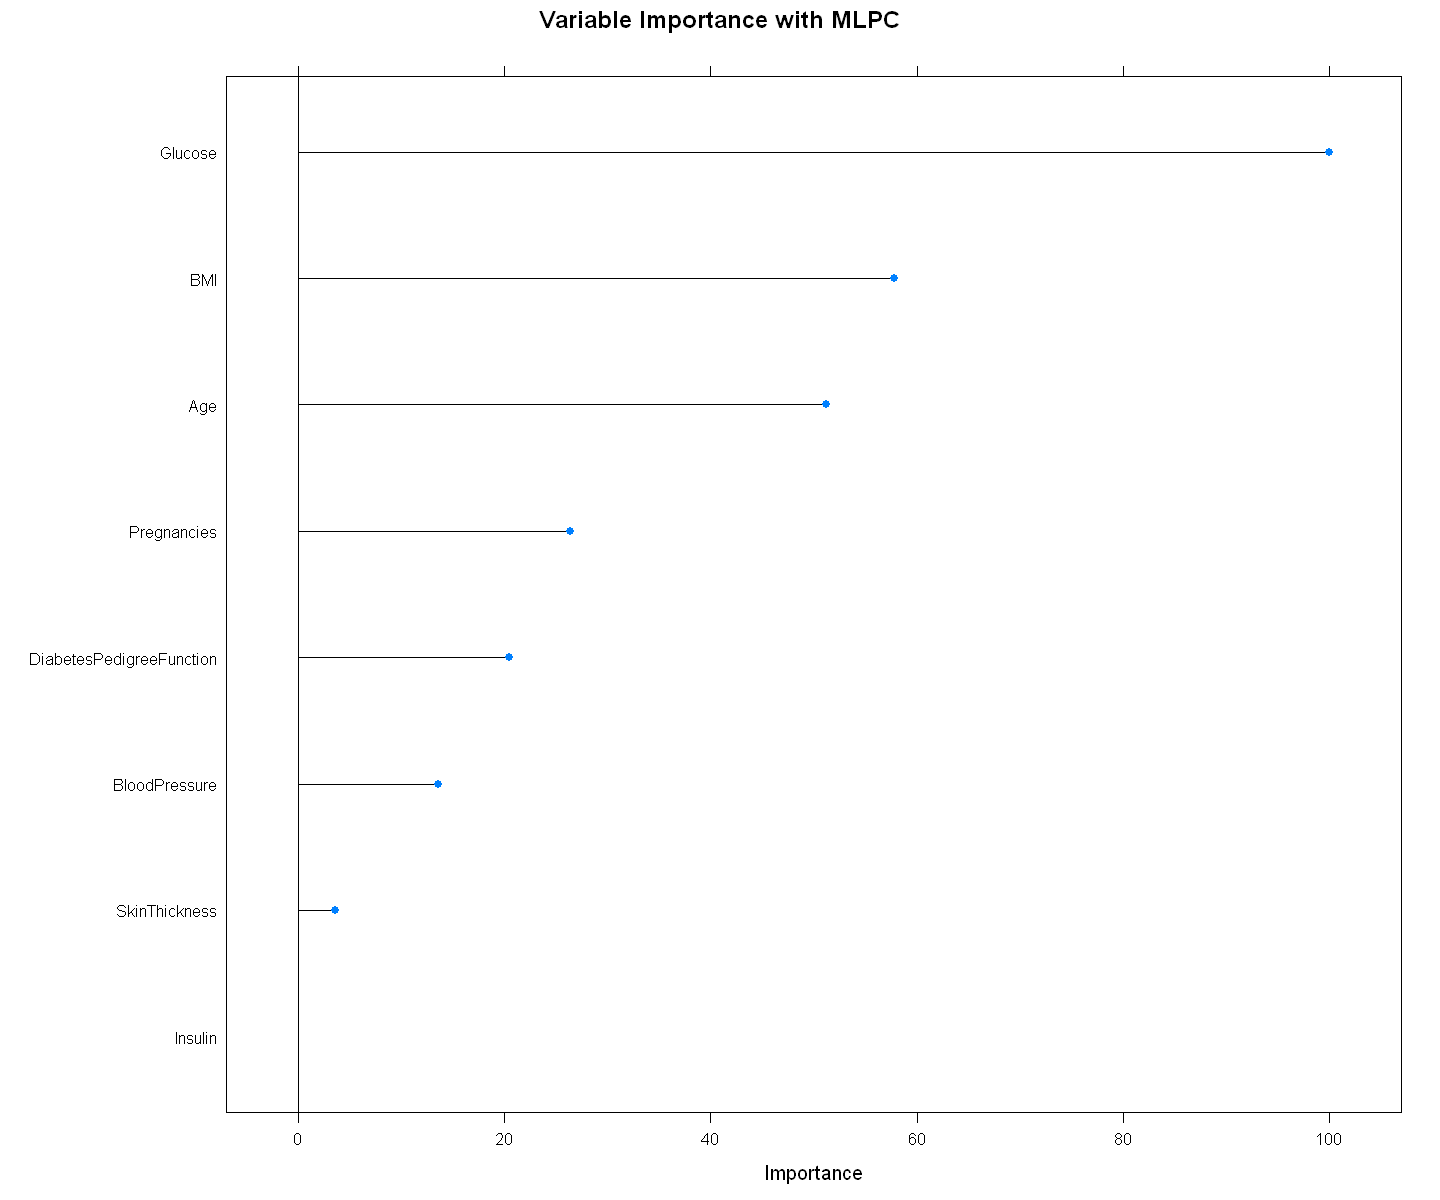

In [46]:
# compute variable importance
varimp_mars <- varImp(modelMLP)
plot(varimp_mars, main="Variable Importance with MLPC")

In [82]:
# Predict on testData before hypertuning
predicted <- predict(modelMLP, tst)
# Compute the confusion matrix
caret::confusionMatrix(predicted,factor(tst$Outcome) )

Confusion Matrix and Statistics

              Reference
Prediction     diabetic non-diabetic
  diabetic           26            7
  non-diabetic       26           94
                                          
               Accuracy : 0.7843          
                 95% CI : (0.7106, 0.8466)
    No Information Rate : 0.6601          
    P-Value [Acc > NIR] : 0.0005461       
                                          
                  Kappa : 0.4726          
                                          
 Mcnemar's Test P-Value : 0.0017280       
                                          
            Sensitivity : 0.5000          
            Specificity : 0.9307          
         Pos Pred Value : 0.7879          
         Neg Pred Value : 0.7833          
             Prevalence : 0.3399          
         Detection Rate : 0.1699          
   Detection Prevalence : 0.2157          
      Balanced Accuracy : 0.7153          
                                          
       'Positiv

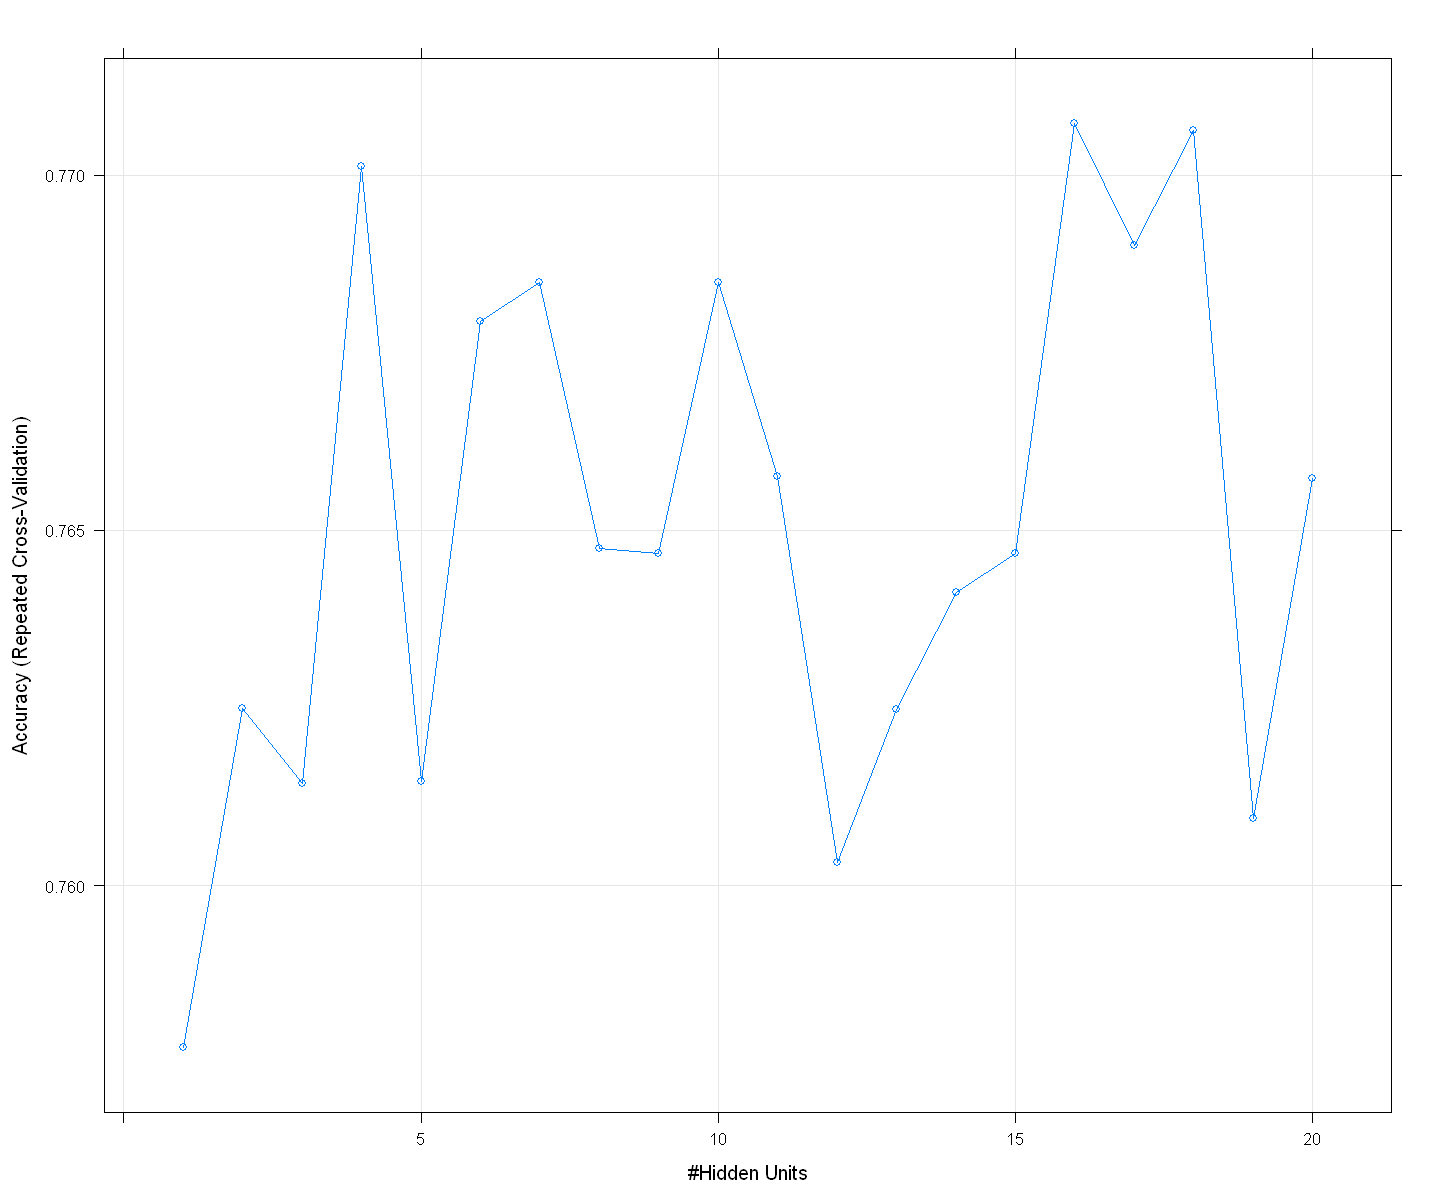

In [40]:
hyper_grid_mlp <- expand.grid(size = seq(1, 20, length = 20) )
set.seed(123)
fit_mlp <- caret::train(
  form = Outcome ~ .,
  data = trn,
  trControl = tcontrol,
  tuneGrid = hyper_grid_mlp,
  method = "mlp",
  preProcess = c("range"),
  metric = metric
)
# Plot model accuracy vs different values 
plot(fit_mlp)

In [41]:
fit_mlp$finalModel

Class: mlp->rsnns
Number of inputs: 8 
Number of outputs: 2 
Maximal iterations: 100 
Initialization function: Randomize_Weights 
Initialization function parameters: -0.3 0.3 
Learning function: Std_Backpropagation 
Learning function parameters: 0.2 0 
Update function:Topological_Order
Update function parameters: 0 
Patterns are shuffled internally: TRUE 
Compute error in every iteration: TRUE 
Architecture Parameters:
$size
[1] 16

All members of model:
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "fitted.values"         "nOutputs"             
[16] "xNames"                "problemType"           "tuneValue"            
[19] "obsLevels"             "param"                

In [95]:
# Predict on testData and Compute the confusion matrix after tuning
predicted2 <- predict(fit_mlp, tst)
# Compute the confusion matrix
caret::confusionMatrix(predicted2,factor(tst$Outcome) )

Confusion Matrix and Statistics

              Reference
Prediction     diabetic non-diabetic
  diabetic           35           15
  non-diabetic       17           86
                                          
               Accuracy : 0.7908          
                 95% CI : (0.7178, 0.8523)
    No Information Rate : 0.6601          
    P-Value [Acc > NIR] : 0.0002786       
                                          
                  Kappa : 0.5295          
                                          
 Mcnemar's Test P-Value : 0.8596838       
                                          
            Sensitivity : 0.6731          
            Specificity : 0.8515          
         Pos Pred Value : 0.7000          
         Neg Pred Value : 0.8350          
             Prevalence : 0.3399          
         Detection Rate : 0.2288          
   Detection Prevalence : 0.3268          
      Balanced Accuracy : 0.7623          
                                          
       'Positiv

### Hyperparameter tuning on Logistic Regression

In [96]:
#  getting information related to the tuning parameters for a model. 
modelLookup("glm")

model,parameter,label,forReg,forClass,probModel
glm,parameter,parameter,TRUE,TRUE,TRUE


In [97]:
# model before hypertuning
modelLRC

Generalized Linear Model 

615 samples
  8 predictor
  2 classes: 'diabetic', 'non-diabetic' 

Pre-processing: re-scaling to [0, 1] (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 553, 553, 554, 554, 553, 555, ... 
Resampling results:

  Accuracy   Kappa    
  0.7754137  0.4799961


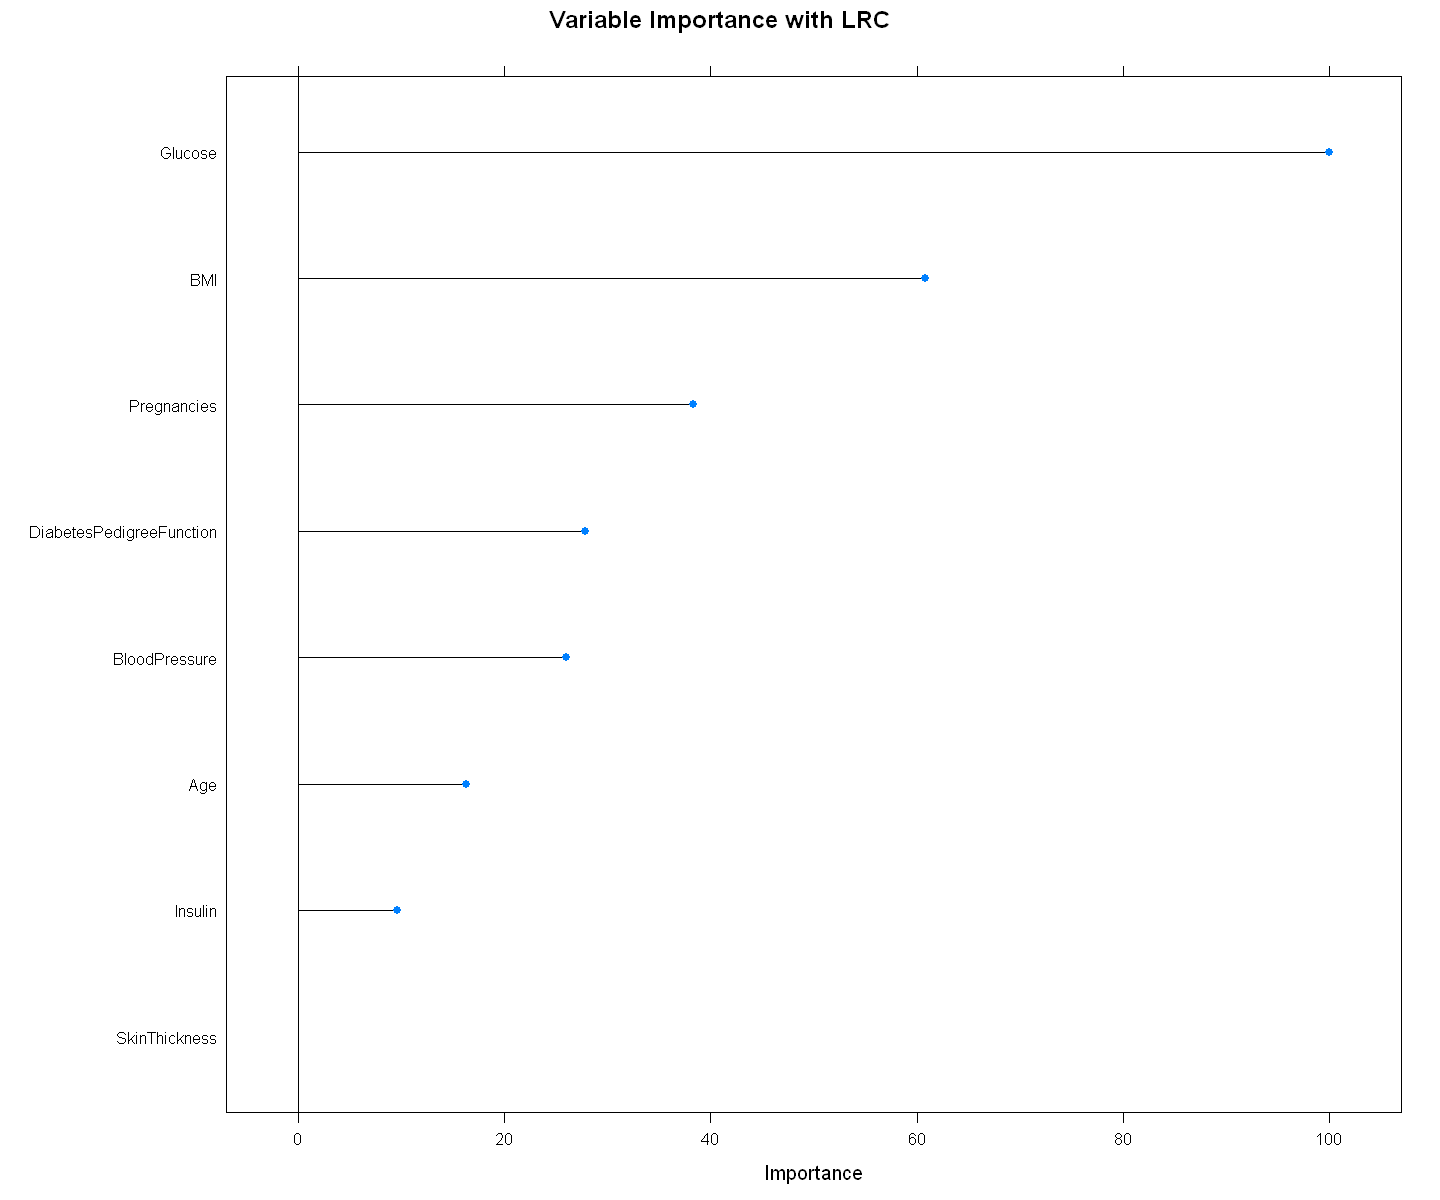

In [98]:
# compute variable importance
varimp_mars <- varImp(modelLRC)
plot(varimp_mars, main="Variable Importance with LRC")

#### No parameter need to tune

In [99]:
# Predict on testData before hypertuning
predicted <- predict(modelLRC, tst)
# Compute the confusion matrix
caret::confusionMatrix(predicted,factor(tst$Outcome) )

Confusion Matrix and Statistics

              Reference
Prediction     diabetic non-diabetic
  diabetic           30           10
  non-diabetic       22           91
                                          
               Accuracy : 0.7908          
                 95% CI : (0.7178, 0.8523)
    No Information Rate : 0.6601          
    P-Value [Acc > NIR] : 0.0002786       
                                          
                  Kappa : 0.5063          
                                          
 Mcnemar's Test P-Value : 0.0518299       
                                          
            Sensitivity : 0.5769          
            Specificity : 0.9010          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.8053          
             Prevalence : 0.3399          
         Detection Rate : 0.1961          
   Detection Prevalence : 0.2614          
      Balanced Accuracy : 0.7390          
                                          
       'Positiv

### Hyperparameter tuning on Gardiant Boosting

In [100]:
#  getting information related to the tuning parameters for a model. 
modelLookup("gbm")

model,parameter,label,forReg,forClass,probModel
gbm,n.trees,# Boosting Iterations,TRUE,TRUE,TRUE
gbm,interaction.depth,Max Tree Depth,TRUE,TRUE,TRUE
gbm,shrinkage,Shrinkage,TRUE,TRUE,TRUE
gbm,n.minobsinnode,Min. Terminal Node Size,TRUE,TRUE,TRUE


In [101]:
# model before hypertuning
modelGBM

Stochastic Gradient Boosting 

615 samples
  8 predictor
  2 classes: 'diabetic', 'non-diabetic' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 553, 553, 554, 554, 553, 555, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.7683533  0.4609102
  1                  100      0.7564901  0.4413765
  1                  150      0.7434723  0.4141353
  2                   50      0.7596986  0.4472035
  2                  100      0.7597335  0.4562553
  2                  150      0.7450940  0.4222485
  3                   50      0.7575210  0.4501108
  3                  100      0.7380160  0.4072832
  3                  150      0.7342267  0.4032589

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The

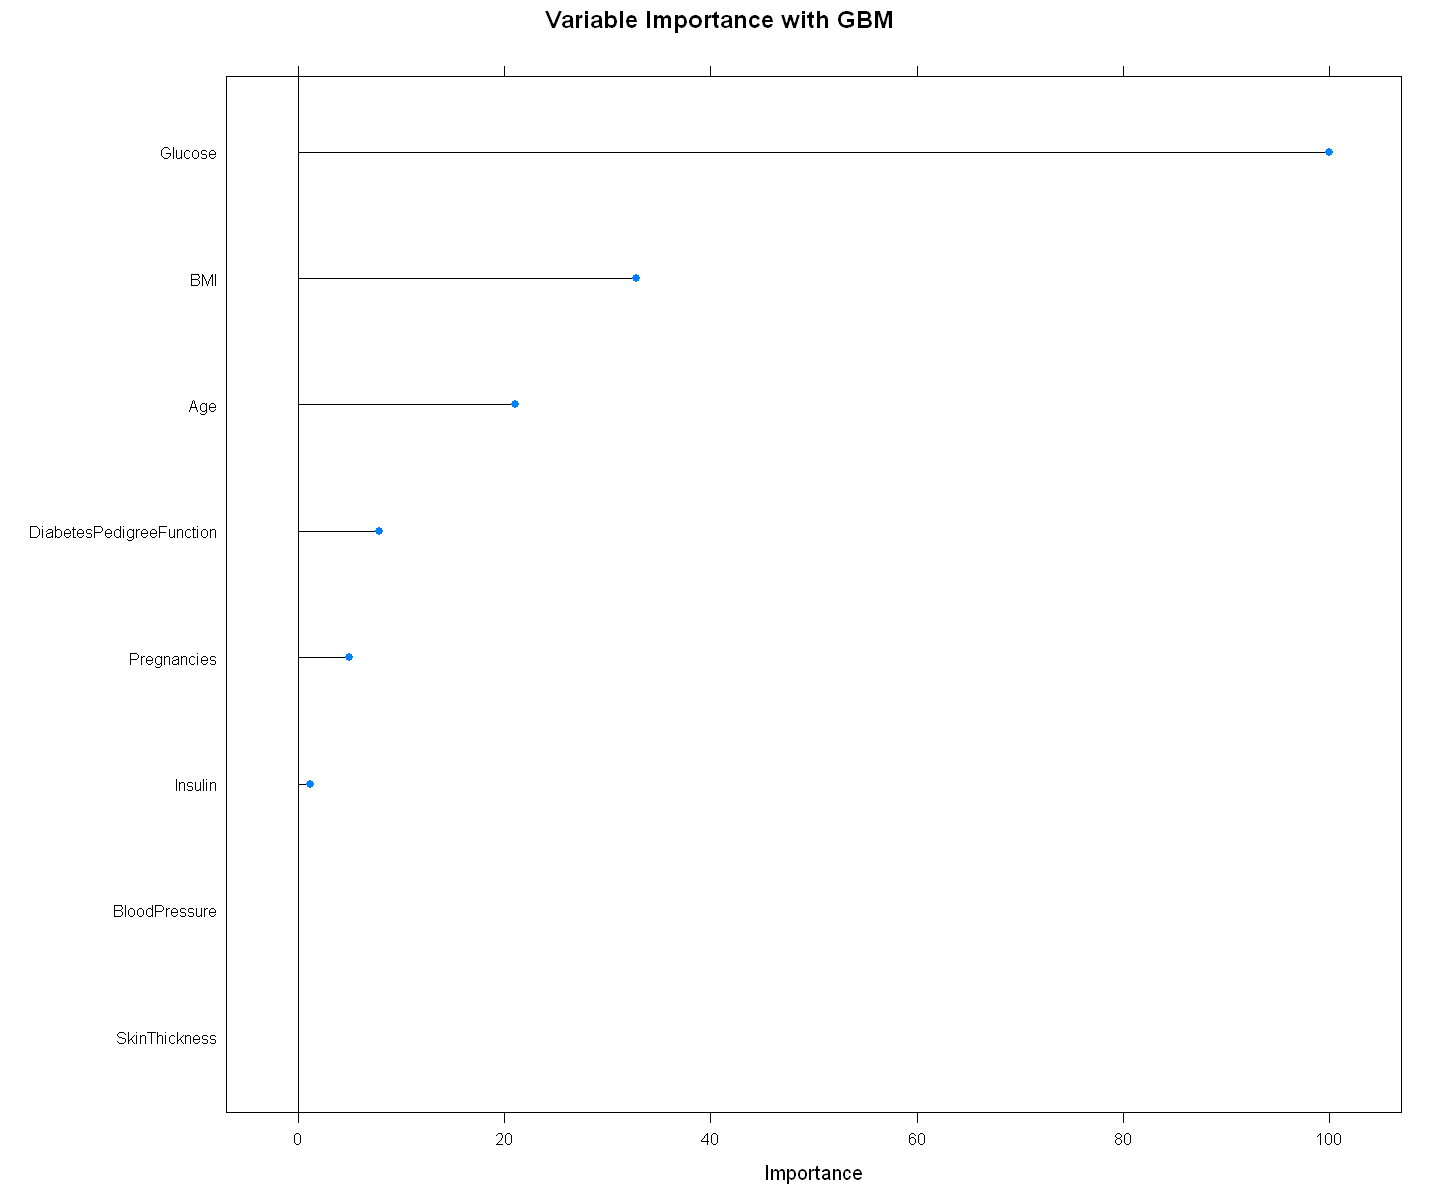

In [102]:
# compute variable importance
varimp_mars <- varImp(modelGBM)
plot(varimp_mars, main="Variable Importance with GBM")

https://bradleyboehmke.github.io/HOML/gbm.html
https://s3.amazonaws.com/assets.datacamp.com/production/course_6650/slides/chapter2.pdf

In [113]:
hyper_grid_gbm <-  expand.grid(n.trees =  seq(from = 10, to = 300, by = 50),                        
                         interaction.depth = seq(from = 1, to = 10, length.out = 6),                          
                         shrinkage = 0.1,                         
                         n.minobsinnode = 10)

In [114]:
set.seed(123)
fit_gbm <- caret::train(
  form = Outcome ~ .,
  data = trn,
  trControl = tcontrol,
  tuneGrid = hyper_grid_gbm,
  method = "gbm",
  metric = metric
    , verbose = FALSE
)


In [115]:
fit_gbm$finalModel

A gradient boosted model with bernoulli loss function.
60 iterations were performed.
There were 8 predictors of which 7 had non-zero influence.

In [116]:
fit_gbm

Stochastic Gradient Boosting 

615 samples
  8 predictor
  2 classes: 'diabetic', 'non-diabetic' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 553, 553, 554, 554, 553, 555, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
   1.0                10      0.7472354  0.3804913
   1.0                60      0.7666872  0.4615336
   1.0               110      0.7591427  0.4495020
   1.0               160      0.7510344  0.4331467
   1.0               210      0.7472440  0.4251323
   1.0               260      0.7450320  0.4206800
   2.8                10      0.7581653  0.4162483
   2.8                60      0.7586492  0.4472209
   2.8               110      0.7505056  0.4322465
   2.8               160      0.7412859  0.4154174
   2.8               210      0.7348437  0.4010815
   2.8               260      0.7375140  0.4067126
   4.6                10      0.7585869  0.4258729
   4.6

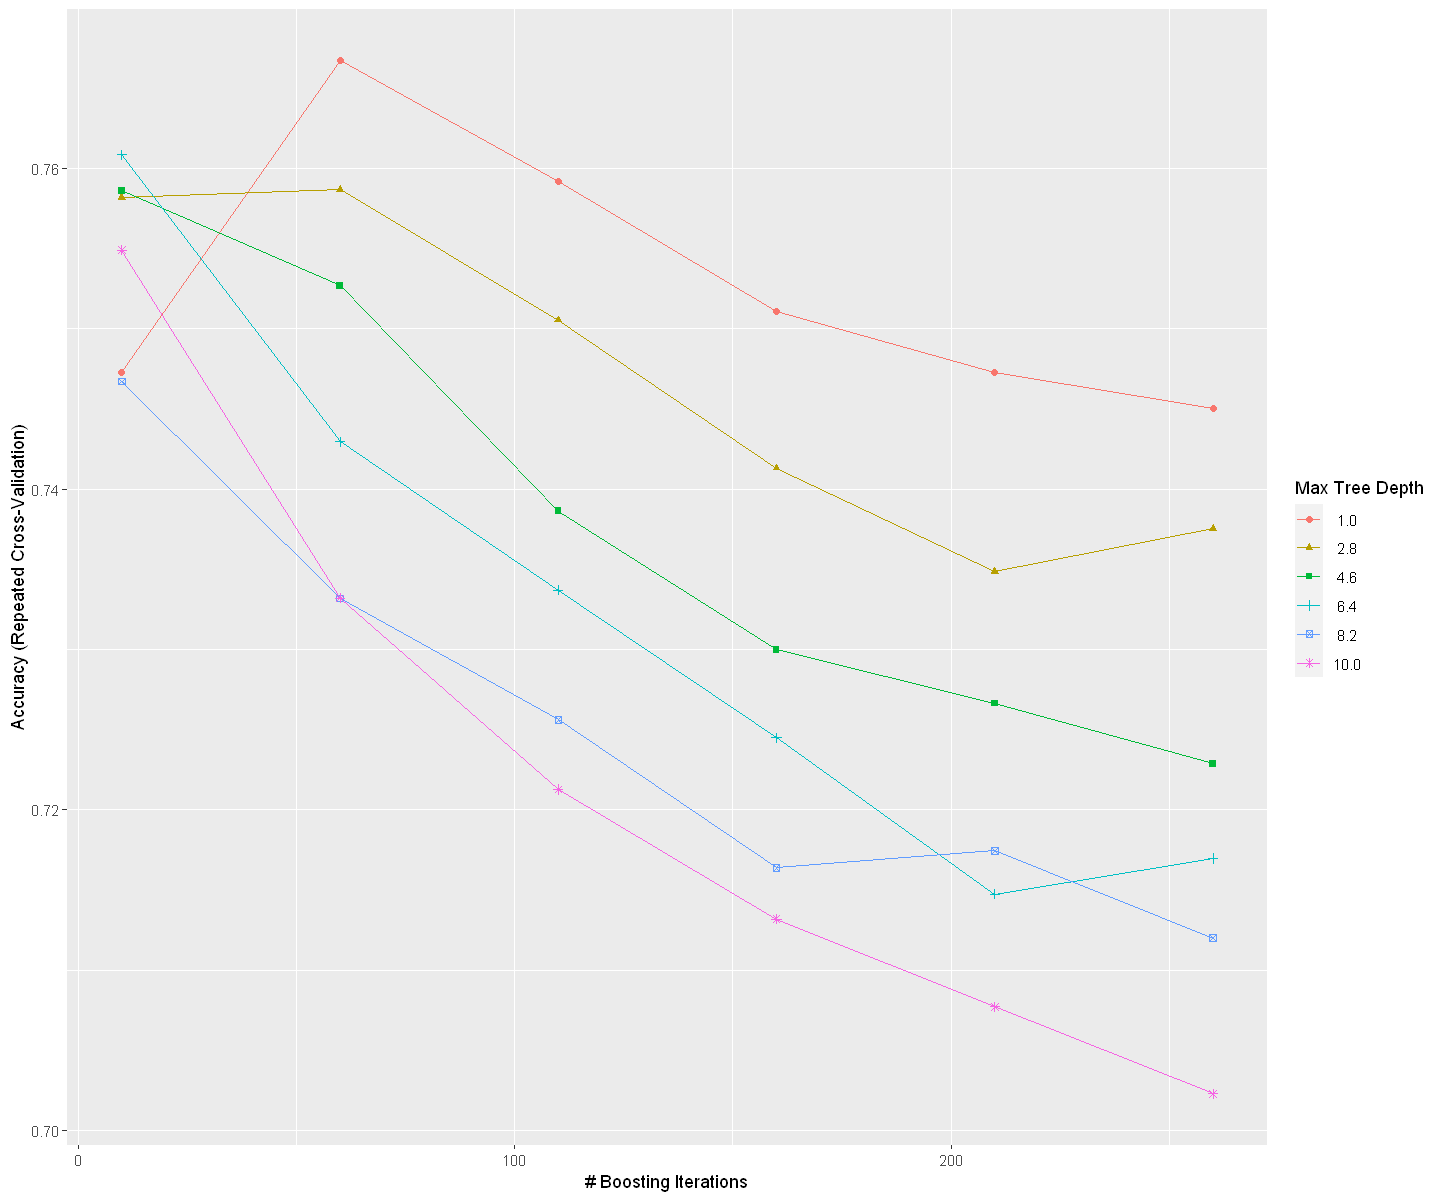

In [117]:
ggplot(fit_gbm)

In [118]:
# Predict on testData and Compute the confusion matrix after tuning
predicted2 <- predict(fit_gbm, tst)
# Compute the confusion matrix
caret::confusionMatrix(predicted2,factor(tst$Outcome) )

Confusion Matrix and Statistics

              Reference
Prediction     diabetic non-diabetic
  diabetic           28           15
  non-diabetic       24           86
                                         
               Accuracy : 0.7451         
                 95% CI : (0.6684, 0.812)
    No Information Rate : 0.6601         
    P-Value [Acc > NIR] : 0.0149         
                                         
                  Kappa : 0.407          
                                         
 Mcnemar's Test P-Value : 0.2002         
                                         
            Sensitivity : 0.5385         
            Specificity : 0.8515         
         Pos Pred Value : 0.6512         
         Neg Pred Value : 0.7818         
             Prevalence : 0.3399         
         Detection Rate : 0.1830         
   Detection Prevalence : 0.2810         
      Balanced Accuracy : 0.6950         
                                         
       'Positive' Class : diabetic

### Adaptive Resampling on GBM

    min: minimum number of resamples per hyperparameter
    alpha: confidence level for removing hyperparameters
    method: "gls" for linear model or "BT" for Bradley-Terry
    complete: if TRUE generates full resampling set

In [121]:
fitControl <- trainControl(method = "adaptive_cv",
                            number=10, repeats=3,
                           adaptive = list(min = 2, alpha = 0.05,
                                           method = "gls", complete = TRUE),
                           search = "random")

In [124]:
set.seed(1232)
gbm_model_adaptive <- caret::train(Outcome~., data=trn, 
                                   method = "gbm",
                                   trControl = fitControl,
                                   verbose = FALSE,
                                   tuneLength = 10)

gbm_model_adaptive

Stochastic Gradient Boosting 

615 samples
  8 predictor
  2 classes: 'diabetic', 'non-diabetic' 

No pre-processing
Resampling: Adaptively Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 553, 553, 554, 553, 554, 553, ... 
Resampling results across tuning parameters:

  shrinkage   interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.01221942  4                  19              4657     0.7237392  0.3850978
  0.07338338  1                  24              2314     0.7436227  0.4263135
  0.08529129  6                  21              4522     0.7249545  0.3967564
  0.08587252  2                   7              1468     0.7140666  0.3561896
  0.21299230  8                   6               866     0.6854839  0.3013602
  0.25267299  5                  16              1010     0.7215759  0.3877784
  0.31727987  8                   5              2910     0.7126520  0.3337196
  0.40650297  4                  23              4101     0.7044553  0.332671

Reference:
http://zevross.com/blog/2017/09/19/predictive-modeling-and-machine-learning-in-r-with-the-caret-package/
https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f